/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Top 5 nearest neighbors:
    Age  Income Type  Distance
11   28   55773    B  0.533156
15   41   86803    B  0.790807
27   39   28792    B  0.815219
19   41   89092    B  0.837221
26   29   30627    B  0.842996


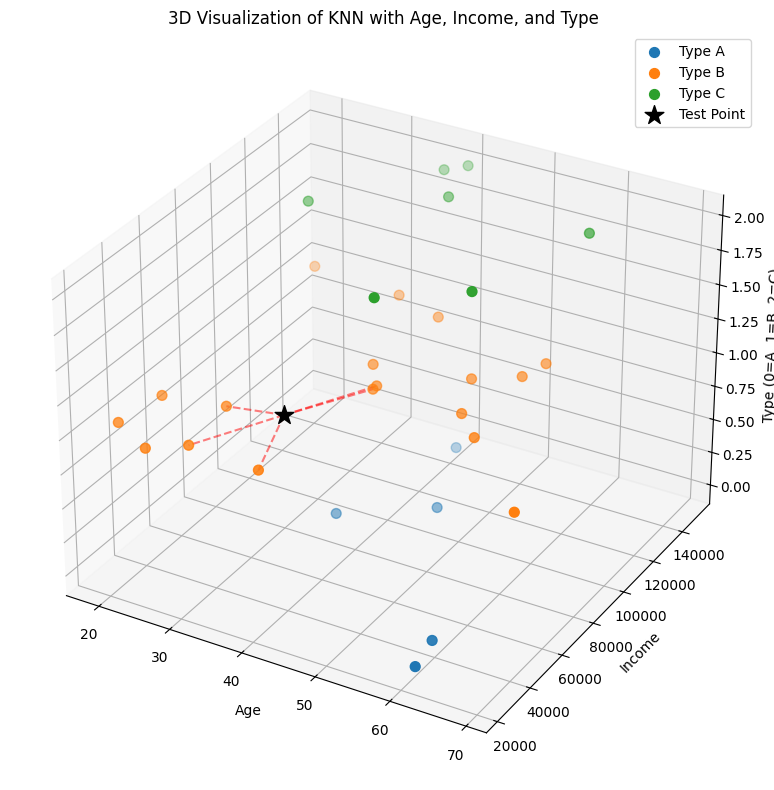

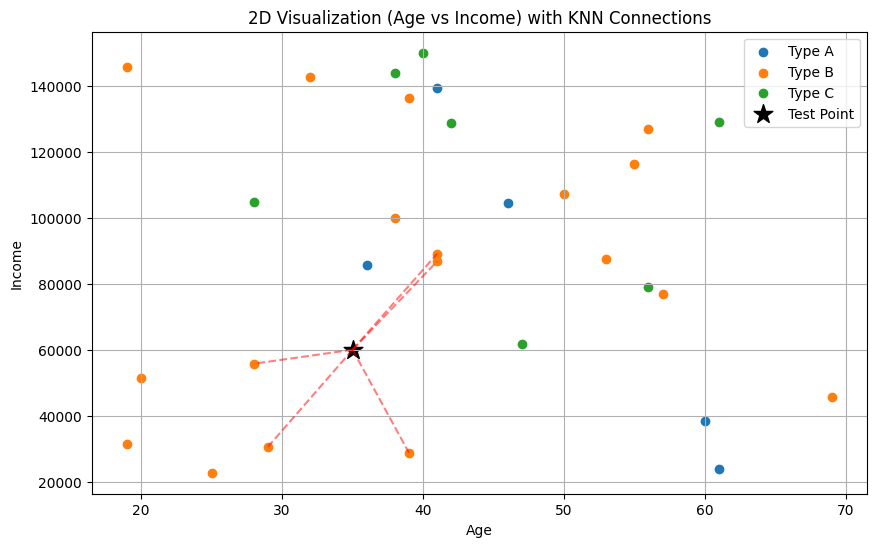

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
n_samples = 30
ages = np.random.randint(18, 70, size=n_samples)
incomes = np.random.randint(20000, 150000, size=n_samples)
types = np.random.choice(['A', 'B', 'C'], size=n_samples)

# Create DataFrame
data = pd.DataFrame({
    'Age': ages,
    'Income': incomes,
    'Type': types
})

# Encode categorical variable (Type)
le = LabelEncoder()
data['Type_encoded'] = le.fit_transform(data['Type'])

# Standardize features
scaler = StandardScaler()
features = scaler.fit_transform(data[['Age', 'Income', 'Type_encoded']])

# For visualization purposes, let's assume we have a test point
test_point = np.array([[35, 60000, 1]])  # Age 35, Income 60k, Type B (encoded as 1)
test_point_scaled = scaler.transform(test_point)

# Calculate Euclidean distances from test point to all other points
distances = np.sqrt(np.sum((features - test_point_scaled) ** 2, axis=1))
data['Distance'] = distances

# Sort by distance
data_sorted = data.sort_values('Distance')

# KNN implementation
k = 5  # Number of neighbors to consider
nearest_neighbors = data_sorted.head(k)
print(f"Top {k} nearest neighbors:")
print(nearest_neighbors[['Age', 'Income', 'Type', 'Distance']])

# 3D Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot all points
for type_label in ['A', 'B', 'C']:
    type_data = data[data['Type'] == type_label]
    ax.scatter(type_data['Age'], type_data['Income'], type_data['Type_encoded'],
               label=f'Type {type_label}', s=50)

# Plot test point
ax.scatter(test_point[0, 0], test_point[0, 1], test_point[0, 2],
           color='black', marker='*', s=200, label='Test Point')

# Plot connections to nearest neighbors
for _, row in nearest_neighbors.iterrows():
    ax.plot([test_point[0, 0], row['Age']],
            [test_point[0, 1], row['Income']],
            [test_point[0, 2], row['Type_encoded']],
            color='red', linestyle='--', alpha=0.5)

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Type (0=A, 1=B, 2=C)')
ax.set_title('3D Visualization of KNN with Age, Income, and Type')
plt.legend()
plt.tight_layout()
plt.show()

# 2D Visualization (Age vs Income)
plt.figure(figsize=(10, 6))
for type_label in ['A', 'B', 'C']:
    type_data = data[data['Type'] == type_label]
    plt.scatter(type_data['Age'], type_data['Income'], label=f'Type {type_label}')

plt.scatter(test_point[0, 0], test_point[0, 1], color='black', marker='*', s=200, label='Test Point')

for _, row in nearest_neighbors.iterrows():
    plt.plot([test_point[0, 0], row['Age']],
             [test_point[0, 1], row['Income']],
             color='red', linestyle='--', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('2D Visualization (Age vs Income) with KNN Connections')
plt.legend()
plt.grid(True)
plt.show()

Predictions for test points: [1 1]
Data has 4 dimensions. Plotting pairwise 2D combinations.


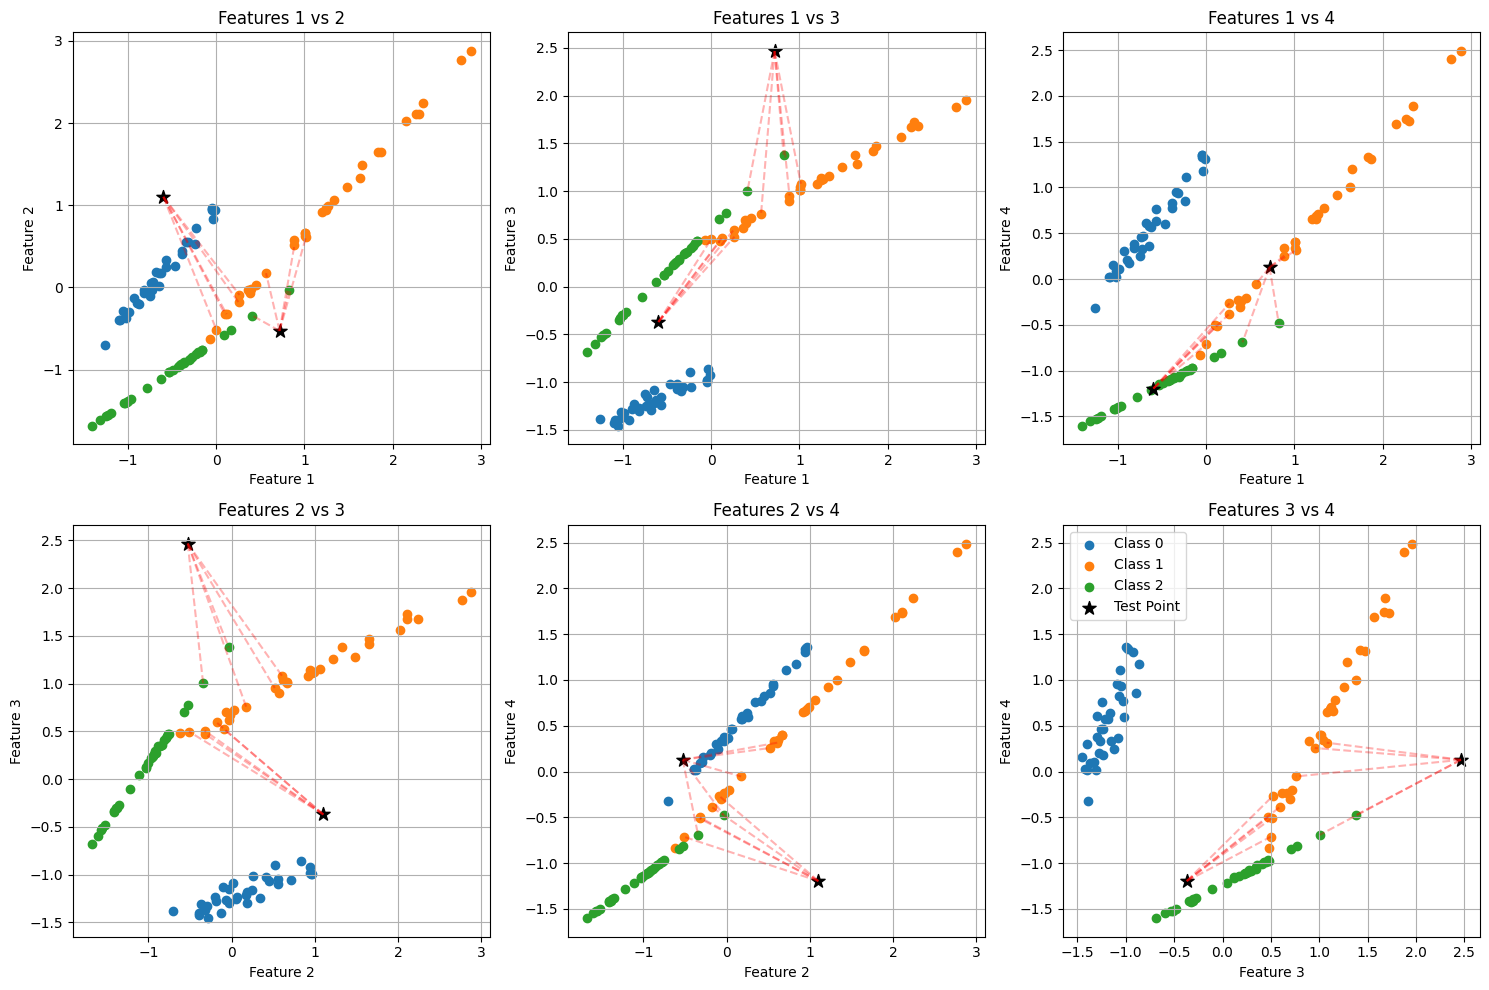

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations

class NDimKNN:
    def __init__(self, k=5):
        self.k = k
        self.scaler = StandardScaler()

    def fit(self, X, y):
        """Fit the KNN model"""
        self.X = self.scaler.fit_transform(X)
        self.y = y

    def predict(self, X_test):
        """Predict class for test samples"""
        X_test_scaled = self.scaler.transform(X_test)
        predictions = []

        for test_point in X_test_scaled:
            # Calculate distances to all training points
            distances = np.sqrt(np.sum((self.X - test_point) ** 2, axis=1))

            # Get indices of k nearest neighbors
            nearest_indices = np.argpartition(distances, self.k)[:self.k]

            # Get labels of nearest neighbors
            nearest_labels = self.y[nearest_indices]

            # Predict the most common class
            unique, counts = np.unique(nearest_labels, return_counts=True)
            predictions.append(unique[np.argmax(counts)])

        return np.array(predictions)

    def visualize(self, X_test=None, max_dims_to_plot=3):
        """Visualize the data and nearest neighbors"""
        n_features = self.X.shape[1]

        if n_features == 1:
            self._plot_1d(X_test)
        elif n_features == 2:
            self._plot_2d(X_test)
        elif n_features == 3:
            self._plot_3d(X_test)
        elif n_features > max_dims_to_plot:
            print(f"Data has {n_features} dimensions. Plotting pairwise 2D combinations.")
            self._plot_pairwise(max_dims_to_plot, X_test)
        else:
            print("Visualization not supported for this dimensionality")

    def _plot_1d(self, X_test):
        plt.figure(figsize=(10, 6))
        for class_label in np.unique(self.y):
            class_mask = (self.y == class_label)
            plt.scatter(self.X[class_mask, 0], np.zeros_like(self.X[class_mask, 0]),
                       label=f'Class {class_label}')

        if X_test is not None:
            X_test_scaled = self.scaler.transform(X_test)
            plt.scatter(X_test_scaled[:, 0], np.zeros_like(X_test_scaled[:, 0]),
                       color='black', marker='*', s=200, label='Test Point')

            for test_point in X_test_scaled:
                distances = np.sqrt(np.sum((self.X - test_point) ** 2, axis=1))
                nearest_indices = np.argpartition(distances, self.k)[:self.k]

                for neighbor in self.X[nearest_indices]:
                    plt.plot([test_point[0], neighbor[0]], [0, 0],
                             color='red', linestyle='--', alpha=0.5)

        plt.xlabel('Feature 1')
        plt.title('1D KNN Visualization')
        plt.legend()
        plt.grid(True)
        plt.show()

    def _plot_2d(self, X_test):
        plt.figure(figsize=(10, 6))
        for class_label in np.unique(self.y):
            class_mask = (self.y == class_label)
            plt.scatter(self.X[class_mask, 0], self.X[class_mask, 1],
                       label=f'Class {class_label}')

        if X_test is not None:
            X_test_scaled = self.scaler.transform(X_test)
            plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
                       color='black', marker='*', s=200, label='Test Point')

            for test_point in X_test_scaled:
                distances = np.sqrt(np.sum((self.X - test_point) ** 2, axis=1))
                nearest_indices = np.argpartition(distances, self.k)[:self.k]

                for neighbor in self.X[nearest_indices]:
                    plt.plot([test_point[0], neighbor[0]], [test_point[1], neighbor[1]],
                             color='red', linestyle='--', alpha=0.5)

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('2D KNN Visualization')
        plt.legend()
        plt.grid(True)
        plt.show()

    def _plot_3d(self, X_test):
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')

        for class_label in np.unique(self.y):
            class_mask = (self.y == class_label)
            ax.scatter(self.X[class_mask, 0], self.X[class_mask, 1], self.X[class_mask, 2],
                      label=f'Class {class_label}')

        if X_test is not None:
            X_test_scaled = self.scaler.transform(X_test)
            ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], X_test_scaled[:, 2],
                      color='black', marker='*', s=200, label='Test Point')

            for test_point in X_test_scaled:
                distances = np.sqrt(np.sum((self.X - test_point) ** 2, axis=1))
                nearest_indices = np.argpartition(distances, self.k)[:self.k]

                for neighbor in self.X[nearest_indices]:
                    ax.plot([test_point[0], neighbor[0]],
                            [test_point[1], neighbor[1]],
                            [test_point[2], neighbor[2]],
                            color='red', linestyle='--', alpha=0.5)

        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        ax.set_title('3D KNN Visualization')
        plt.legend()
        plt.tight_layout()
        plt.show()

    def _plot_pairwise(self, max_dims, X_test):
        n_features = self.X.shape[1]
        feature_combinations = list(combinations(range(n_features), 2))

        if len(feature_combinations) > 6:  # Limit to 6 plots
            feature_combinations = feature_combinations[:6]

        plt.figure(figsize=(15, 10))

        for i, (f1, f2) in enumerate(feature_combinations):
            plt.subplot(2, 3, i+1)

            for class_label in np.unique(self.y):
                class_mask = (self.y == class_label)
                plt.scatter(self.X[class_mask, f1], self.X[class_mask, f2],
                           label=f'Class {class_label}')

            if X_test is not None:
                X_test_scaled = self.scaler.transform(X_test)
                plt.scatter(X_test_scaled[:, f1], X_test_scaled[:, f2],
                           color='black', marker='*', s=100, label='Test Point')

                for test_point in X_test_scaled:
                    distances = np.sqrt(np.sum((self.X - test_point) ** 2, axis=1))
                    nearest_indices = np.argpartition(distances, self.k)[:self.k]

                    for neighbor in self.X[nearest_indices]:
                        plt.plot([test_point[f1], neighbor[f1]],
                                 [test_point[f2], neighbor[f2]],
                                 color='red', linestyle='--', alpha=0.3)

            plt.xlabel(f'Feature {f1+1}')
            plt.ylabel(f'Feature {f2+1}')
            plt.title(f'Features {f1+1} vs {f2+1}')
            plt.grid(True)

        plt.legend()
        plt.tight_layout()
        plt.show()

# Example usage with synthetic data
if __name__ == "__main__":
    # Generate synthetic data with 4 features and 3 classes
    X, y = make_classification(n_samples=100, n_features=4, n_classes=3,
                              n_clusters_per_class=1, random_state=42)

    # Create and fit KNN model
    knn = NDimKNN(k=5)
    knn.fit(X, y)

    # Create test points
    test_points = np.array([
        [0.5, -0.5, 1.0, 0.5],
        [-1.0, 1.5, -0.5, -1.0]
    ])

    # Make predictions
    predictions = knn.predict(test_points)
    print("Predictions for test points:", predictions)

    # Visualize the data and nearest neighbors
    knn.visualize(test_points)